In [11]:
import numpy as np
% matplotlib inline

'''Task 1'''
'''Task 1.1'''


def Rie_sum(f, a, b, n, method='midpoint'):
    dx = (b - a) / n
    x = np.linspace(a, b, n + 1)

    if method == 'lower':
        x_lower = x[:-1]
        return np.sum(f(x_lower) * dx)
    elif method == 'upper':
        x_upper = x[1:]
        return np.sum(f(x_upper) * dx)
    elif method == 'midpoint':
        x_mid = (x[:-1] + x[1:]) / 2
        return np.sum(f(x_mid) * dx)
    else:
        raise ValueError("Method must be 'lower', 'upper' or 'midpoint'.")


print("Rie sum midpoint = ", Rie_sum(np.sin, 0, np.pi / 2, 100, 'midpoint'))
print("Rie sum upper = ", Rie_sum(np.sin, 0, np.pi / 2, 100, 'upper'))
print("Rie sum lower = ", Rie_sum(np.sin, 0, np.pi / 2, 100, 'lower'))

Rie sum midpoint =  1.0000102809119054
Rie sum upper =  1.007833419873582
Rie sum lower =  0.992125456605633


In [12]:
'''Task 1.2'''
A = np.log(2)
print("A = ", A)

approximation = Rie_sum(lambda x: 1 / x, 1, 2, 50000, method='midpoint')
print("Approximation = ", approximation)

Difference = np.abs(approximation - A)
print("Difference = ", Difference)

A =  0.6931471805599453
Approximation =  0.6931471805474454
Difference =  1.2499890011952175e-11


In [13]:
from scipy.integrate import quad

'''Task 1.3'''


def func1(t):
    return (9 * t ** 4 + 4 * t ** 2) ** 0.5


print("Integration = ", quad(func1, -1, 2))

print("Rie sum = ", Rie_sum(func1, -1, 2, 100))

Integration =  (10.513125162759344, 3.3785477526748764e-08)
Rie sum =  10.51239573790192


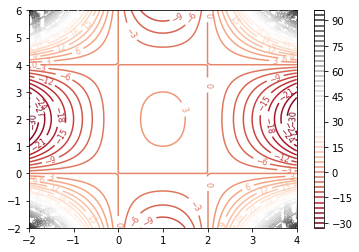

In [24]:
from numpy import *
from scipy.optimize import fmin
% matplotlib inline
from matplotlib.pyplot import *

'''Task 2'''
'''Task 2.1'''
x_axis = linspace(-2, 4, 100)
y_axis = linspace(-2, 6, 100)
X, Y = meshgrid(x_axis, y_axis)

Z = 8 * X * Y - 4 * X ** 2 * Y - 2 * X * Y ** 2 + X ** 2 * Y ** 2

contours = contour(X, Y, Z, 50, cmap="RdGy")
clabel(contours, inline=True, fontsize=8)
colorbar()

In [25]:
'''Task 2.2'''


def f(xy):
    x, y = xy
    return -(8 * x * y - 4 * x ** 2 * y - 2 * x * y ** 2 + x ** 2 * y ** 2)


m = fmin(f, (-1, 2), retall=True)
print(m[0])

Optimization terminated successfully.
         Current function value: -4.000000
         Iterations: 47
         Function evaluations: 91
[0.99997326 1.99997444]


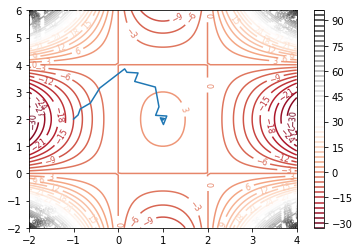

In [26]:
'''Task 2.3'''
x_axis = linspace(-2, 4, 100)
y_axis = linspace(-2, 6, 100)
X, Y = meshgrid(x_axis, y_axis)
Z = 8 * X * Y - 4 * X ** 2 * Y - 2 * X * Y ** 2 + X ** 2 * Y ** 2
contours = contour(X, Y, Z, 50, cmap="RdGy")
clabel(contours, inline=True, fontsize=8)
colorbar()

xq = list()
yq = list()
for j in m[1]:
    xq.append(j[0])
    yq.append(j[1])

plot(xq, yq)

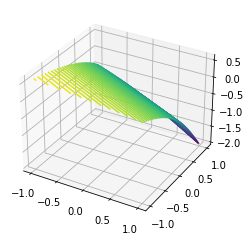

In [17]:
'''Task 3'''
'''Task 3.1'''
from numpy import *
import matplotlib.pyplot as mp
from scipy.optimize import fsolve

N = 1000
x1 = linspace(-1, 1, N)
y1 = linspace(-1, 1, N)
X, Y = meshgrid(x1, y1)

'''Smoothness of z(x,y)'''


def f(x, y):
    return fsolve(lambda z: x + 2 * y + z + e ** (2 * z) - 1, array([1]))


Z = zeros((N, N))
for i in range(N):
    for j in range(N):
        Z[i, j] = f(X[i, j], Y[i, j])

ax = mp.axes(projection="3d")
ax.contour3D(X, Y, Z, 100)


In [18]:
'''Task 3.2'''
'''Coefficient of taylor polynomial P2(x, y)'''
h = 1e-6

A = (f(h, 0) - f(-h, 0)) / (2 * h)
B = (f(0, h) - f(0, -h)) / (2 * h)
C = (f(h, 0) - 2 * f(0, 0) + f(-h, 0)) / (2 * h ** 2)
D = (f(h, h) - f(h, -h) - f(-h, h) + f(-h, -h)) / (4 * h ** 2)
E = (f(0, h) - 2 * f(0, 0) + f(0, -h)) / (2 * h ** 2)

print("A =", A, "\nB=", B, "\nC=", C, "\nD=", D, "\nE=", E)

A = [-0.33333333] 
B= [-0.66666667] 
C= [-0.07409206] 
D= [-0.2962892] 
E= [-0.2962941]


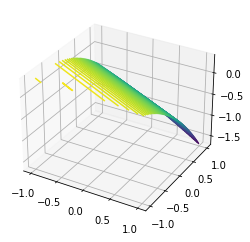

In [19]:
'''Task 3.3'''

'''Plot of P2(x, y)'''


def p2(x, y):
    return A * x + B * y + C * x ** 2 + D * x * y + E * y ** 2


ax = mp.axes(projection='3d')
ax.contour3D(X, Y, p2(X, Y), 100)

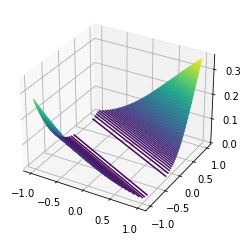

In [20]:
'''Task 3.4'''
'''Plot of absolute error e(x, y)'''
ax = mp.axes(projection='3d')
ax.contour3D(X, Y, abs(Z - p2(X, Y)), 100)